<h1><b> INN Hotels - Problem Statement </b></h1>

<center><img src="https://img.freepik.com/free-photo/luxury-bedroom-suite-resort-high-rise-hotel-with-working-table_105762-1783.jpg?w=740&t=st=1654505493~exp=1654506093~hmac=fc1167df2b3797e32400448b458fd80afb85e31403c7689e0b1506023ff754a7" width="720"></center>

### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.


The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Data
file_path = '/content/drive/My Drive/CARRIER/AIML/INNHotelsGroup.csv'
df = pd.read_csv(file_path)

In [4]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

In [5]:
# Print Data(Head)
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Data types
data.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [7]:
# Missing & Null values
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
# Data Describing
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [10]:
# Number of Duplicate Rows
data.duplicated().sum()

0

In [11]:
case_id_is_unique = data['Booking_ID'].is_unique
case_id_is_unique

True

**Let's drop the Booking_ID column first before we proceed forward**.

In [12]:
data = data.drop(["Booking_ID"], axis=1)

### Statistical summary of the data

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


**The below functions need to be defined to carry out the EDA.**

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on lead time

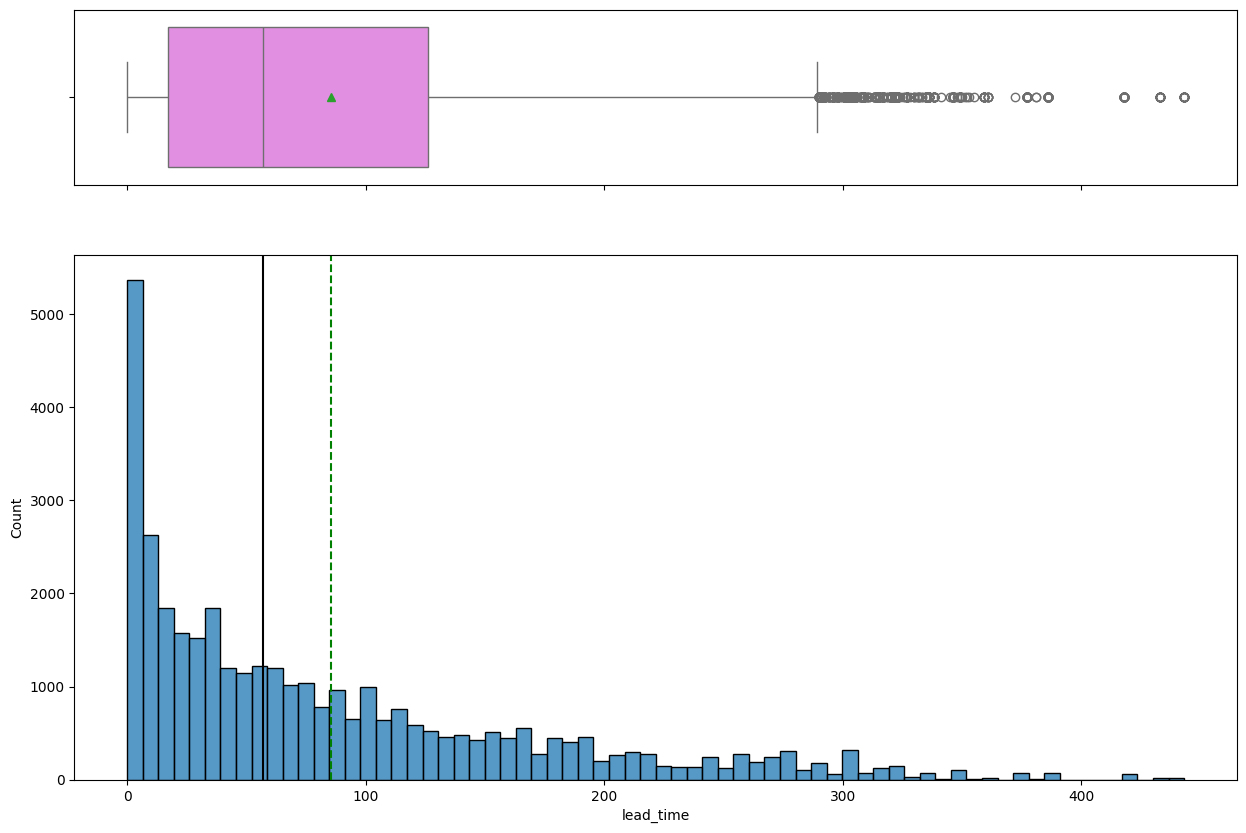

In [19]:
histogram_boxplot(data, "lead_time")

- The distribution of lead time is right-skewed, and there are many outliers.
- Some customers made booking around 500 days in advance.
- Many customers have made the booking on the same day of arrival as well.

#### Observations on average price per room

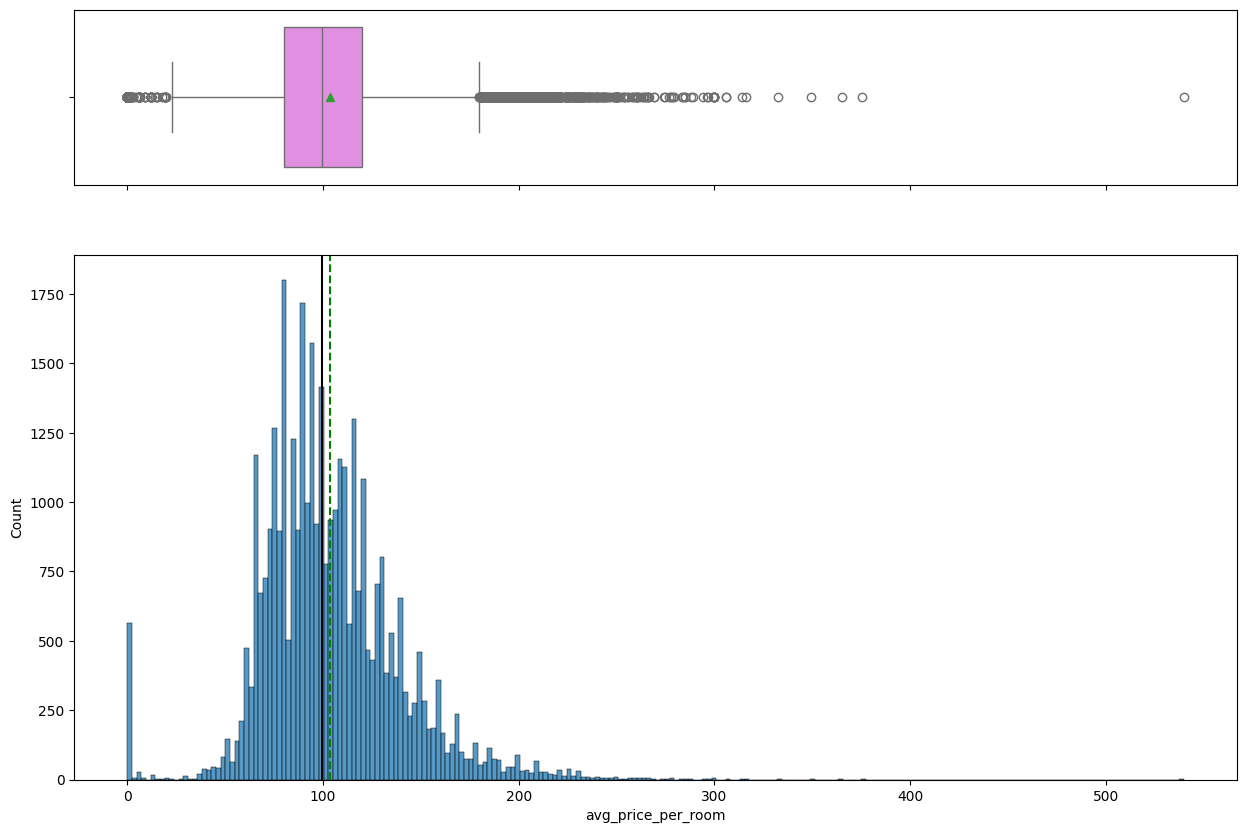

In [20]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution of average price per room is skewed to right. There are outliers on both sides.
* The average price of a room is around ~100 euros.
* There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. Instead of dropping it, we will clip this to the upper whisker (Q3 + 1.5 * IQR).
* Interestingly some rooms have a price equal to 0. Let's check them.

In [21]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [22]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

,count
market_segment_type,
Complementary,354
Online,191


* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service given by the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [23]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [24]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Observations on number of adults

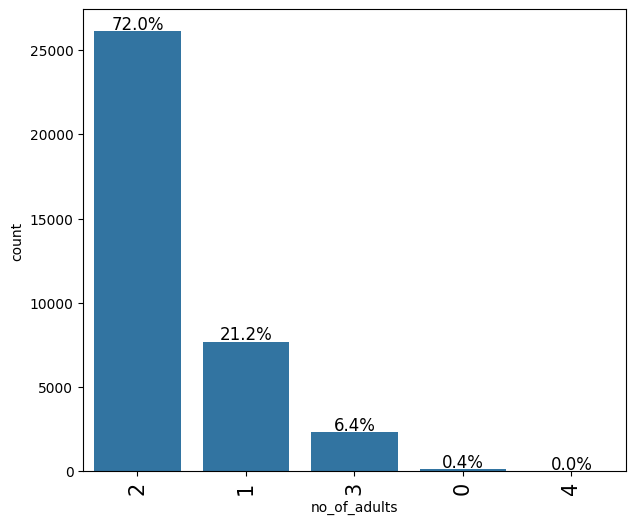

In [25]:
labeled_barplot(data, "no_of_adults", perc=True)

* 72% of the bookings were made for 2 adults.

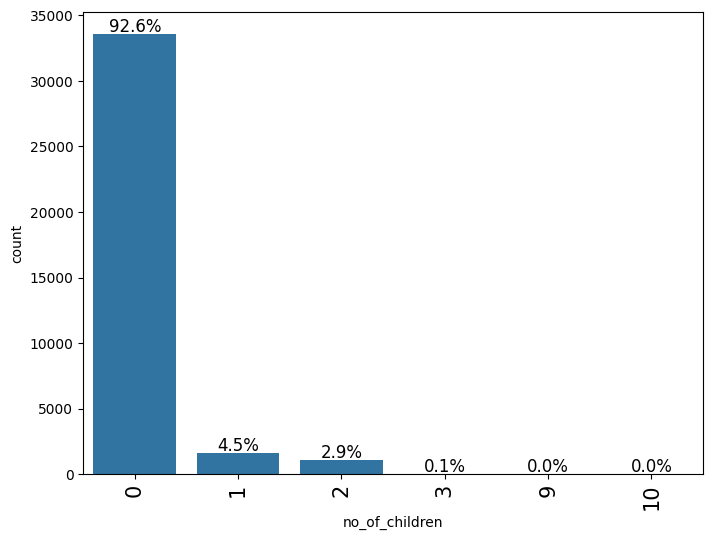

In [26]:
labeled_barplot(data, "no_of_children", perc=True)

* 93% of the customers didn't make reservations for children.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely.
* We will replace these values with the maximum value of 3 children.

In [27]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

#### Observations on number of week nights

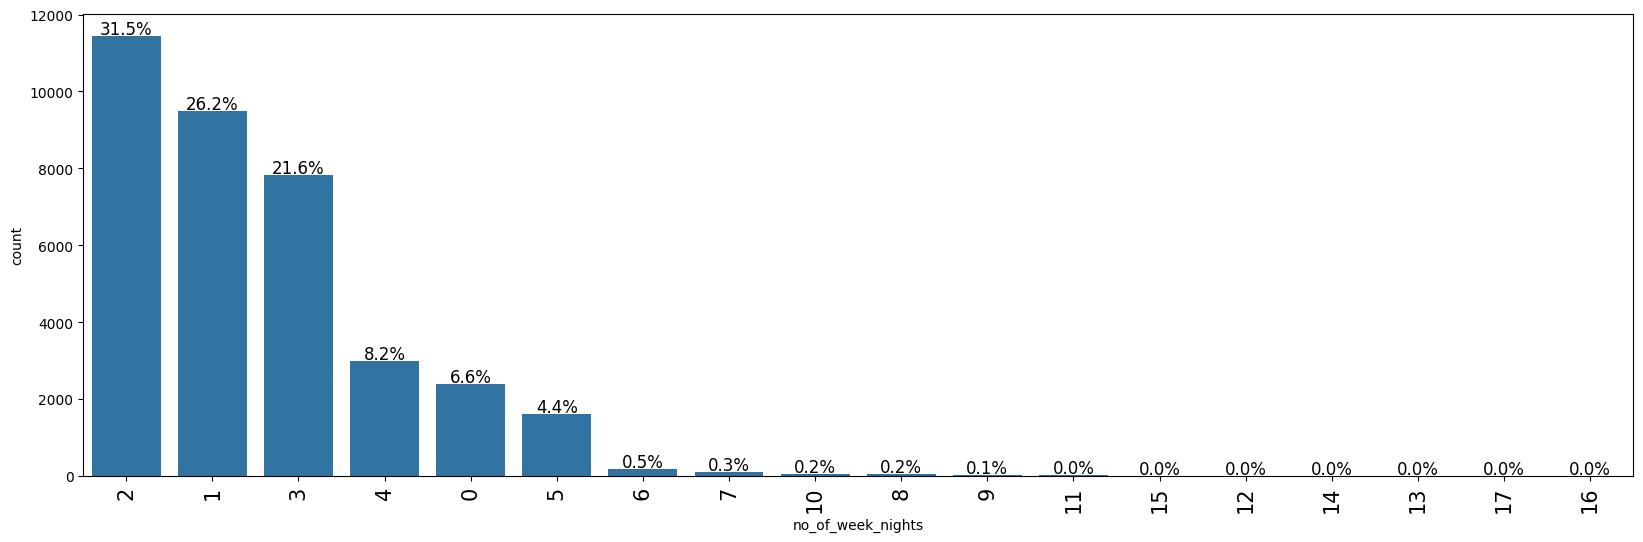

In [28]:
labeled_barplot(data, "no_of_week_nights", perc=True)

* Most bookings are made for 2 nights (31.5%) followed by 1 night (26.2%).
* A very small proportion of customers made the booking for more than 10 days.

#### Observations on required car parking space

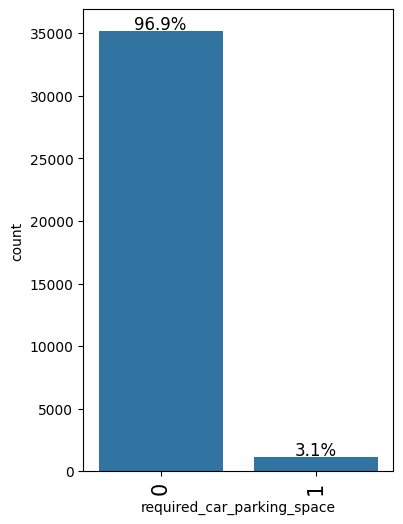

In [29]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 96.9% of the customers do not require a car parking space.

#### Observations on type of meal plan

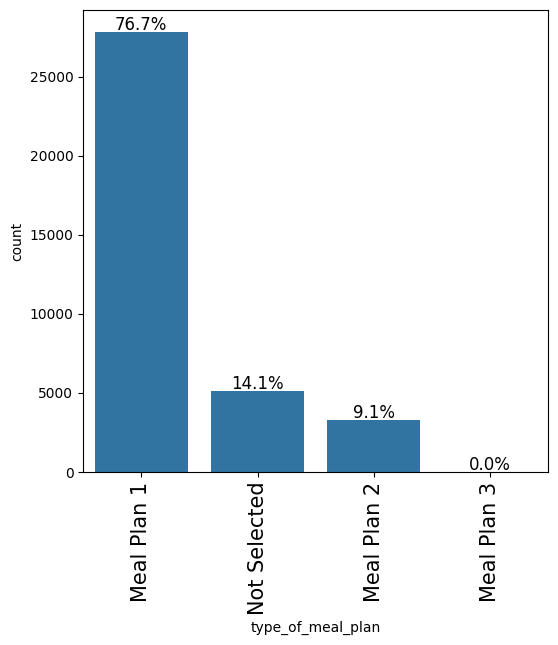

In [31]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* Most of the customers prefer meal plan 1 that is only breakfast.
* 14.1% of the customers didn't select a meal plan.

#### Observations on arrival month

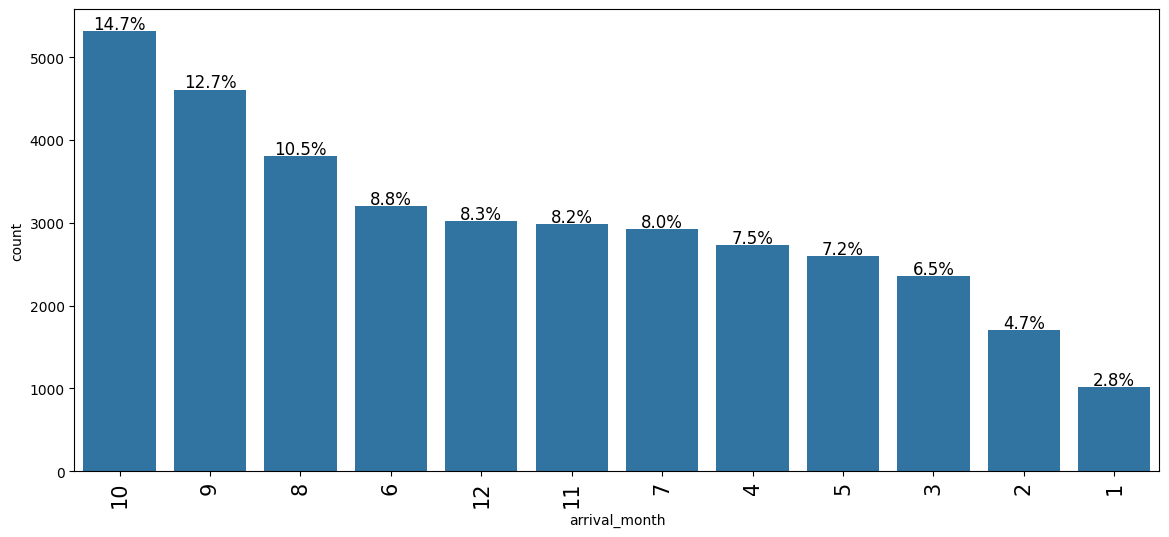

In [32]:
labeled_barplot(data, "arrival_month", perc=True)

* October is the busiest month for the hotel followed by September.
* 14.7% of the bookings were made in October.

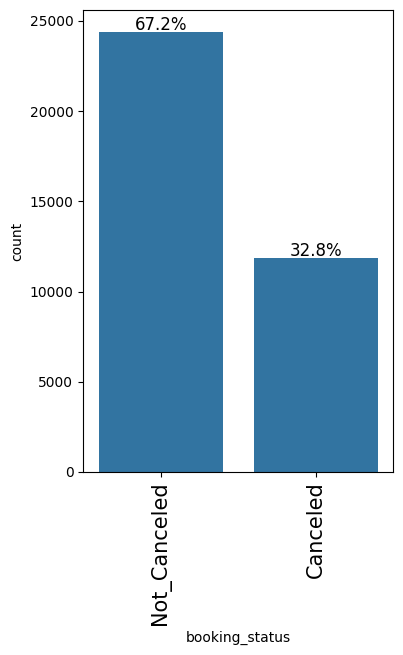

In [33]:
labeled_barplot(data, "booking_status", perc=True)

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [34]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

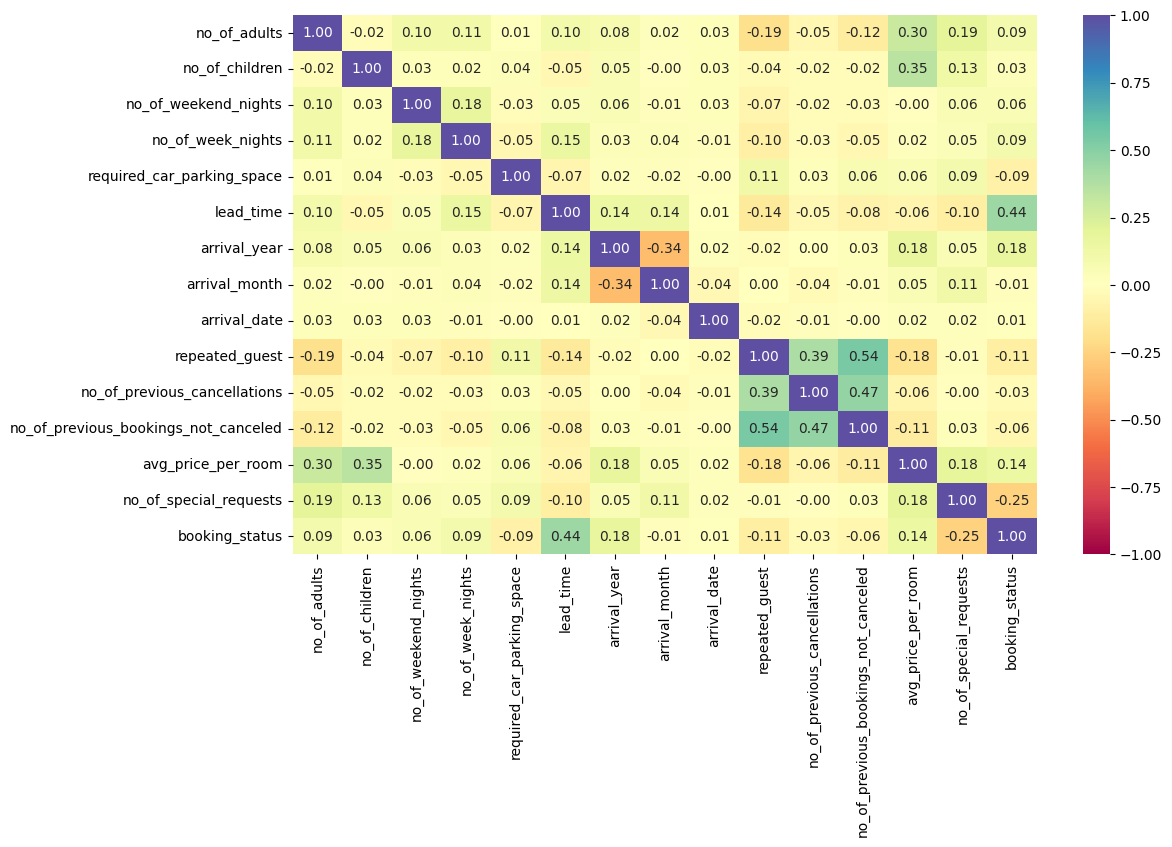

In [35]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
    * This makes sense as the more the number of customers more rooms they will require thus increasing the cost.
* There's a negative correlation between average room price and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest.
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments.**

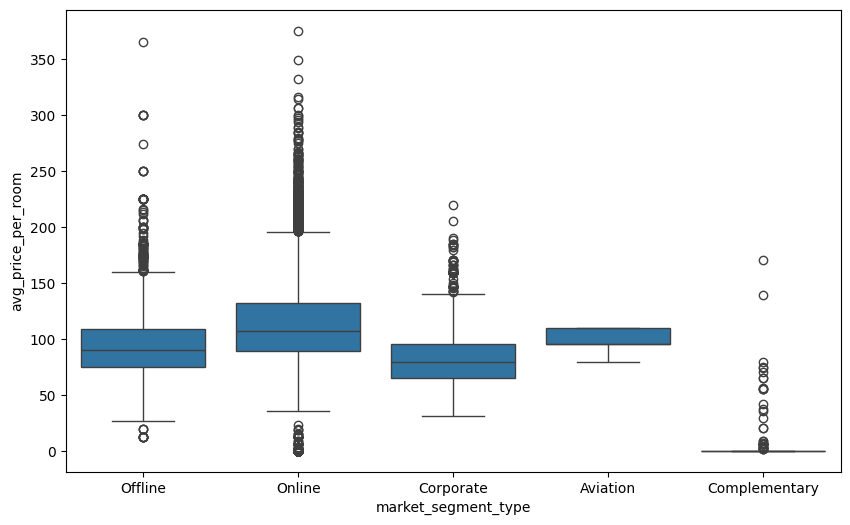

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* The Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see if the special requests made by the customers impact the prices of a room**

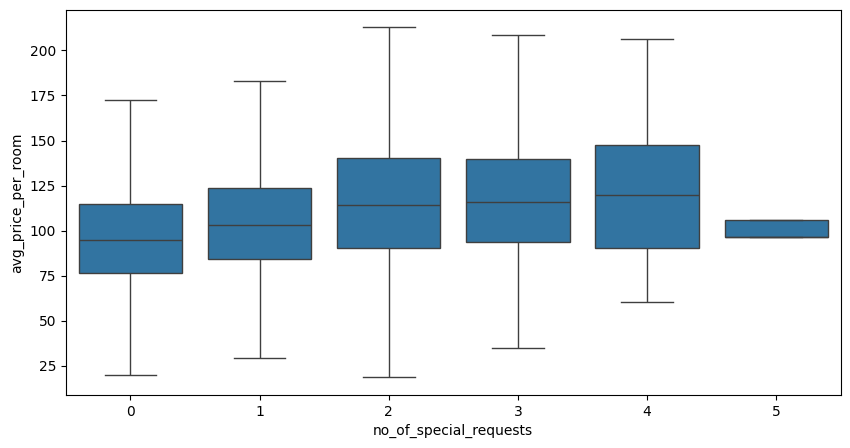

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data,
    x="no_of_special_requests",
    y="avg_price_per_room",
    showfliers=False,  # turning off the outliers
)
plt.show()

* The median prices of the rooms where some special requests were made by the customers are slightly higher than the rooms where customers didn't make any requests.

**We saw earlier that there is a positive correlation between booking status and average price per room. Let's analyze it**

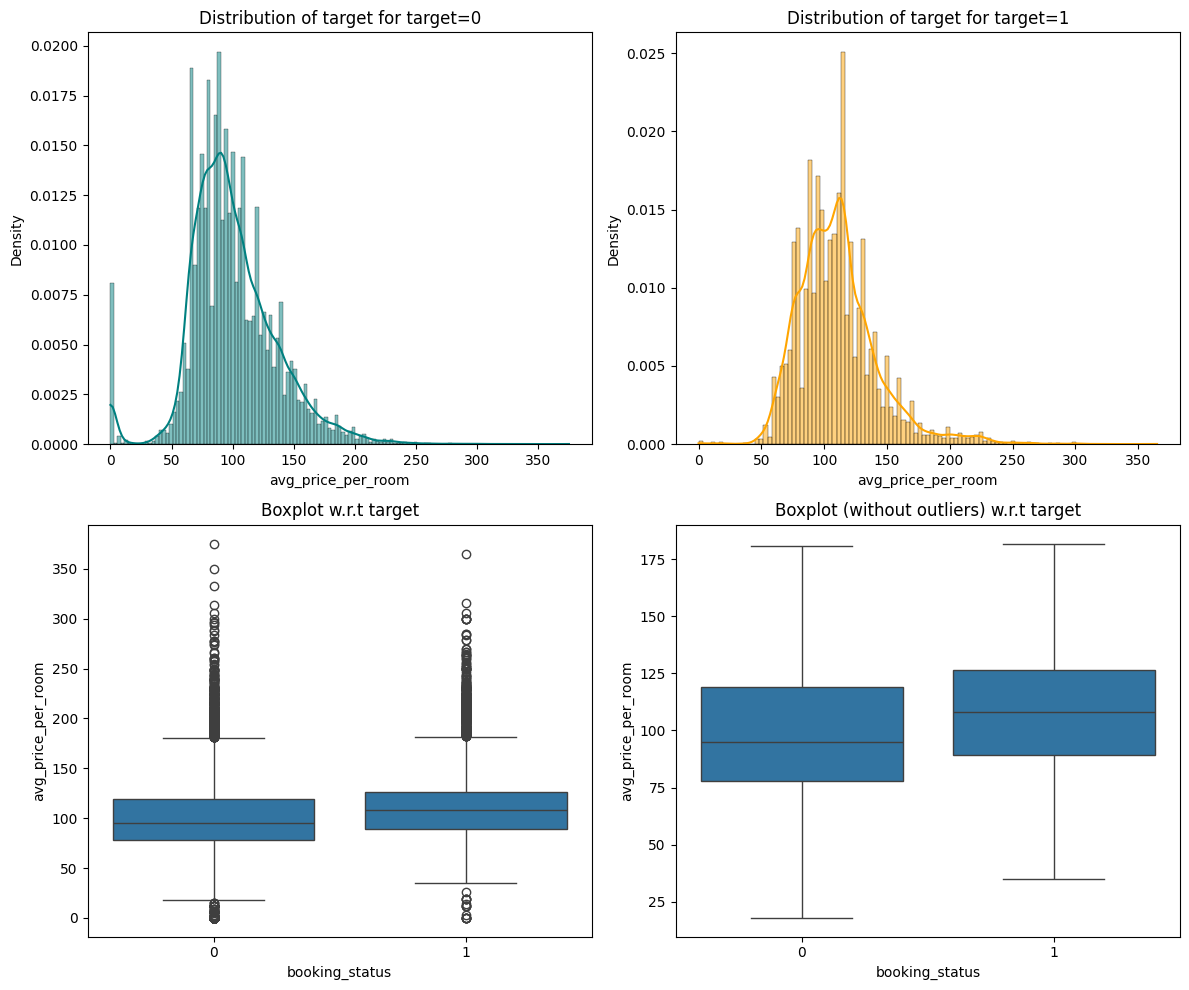

In [38]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The distribution of prices for canceled bookings and not canceled bookings is quite similar.
* The prices for the canceled bookings are slightly higher than the bookings that were not canceled.

**Let's find out what are the busiest months in the hotel.**

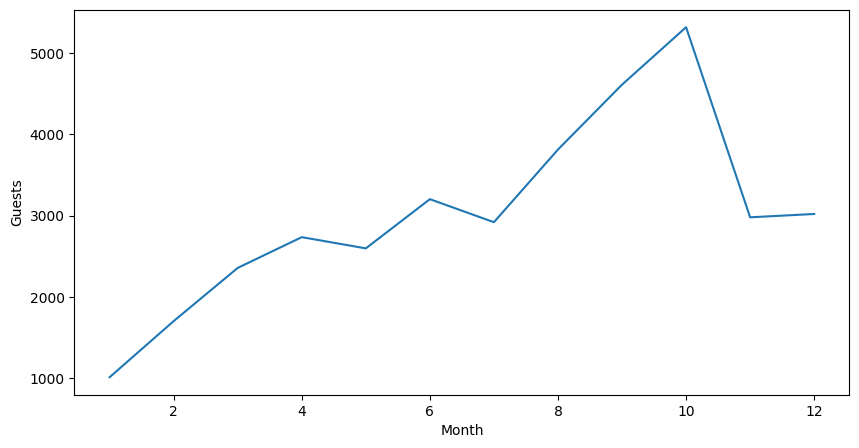

In [39]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* The trend shows the number of bookings remains consistent from April to July and the hotel sees around 3000 to 3500 guests.
* Most bookings were made in October - more than 5000 bookings.
* The least bookings were made in January - around 1000 bookings.

## Data Preprocessing

### Outlier Check

- Let's check for outliers in the data.

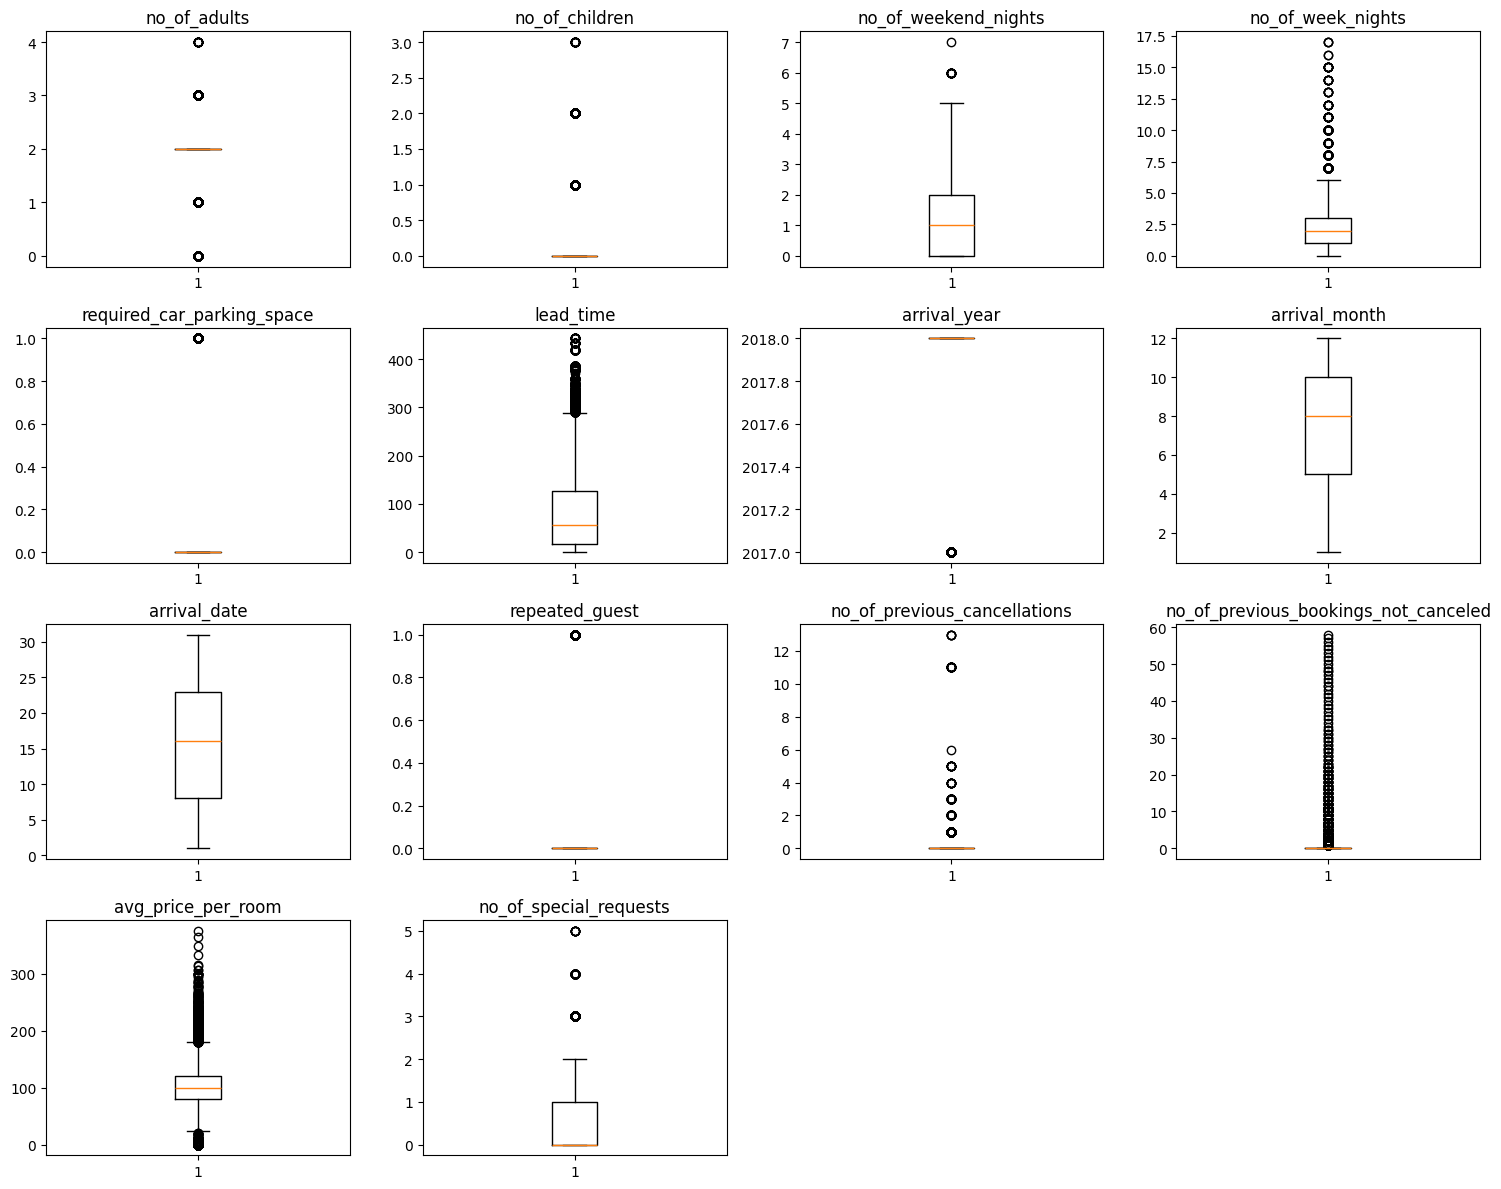

In [40]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Data Preparation for Modelling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features and scale numerical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [43]:
# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Library for computing permutation feature importance
from sklearn.inspection import permutation_importance

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [41]:
# defining the explanatory (independent) and response (dependent) variables
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

In [44]:
# Normalizing the numerical variables
num_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler
X[num_columns] = scaler.transform(X[num_columns])

In [46]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

# specifying the datatype of the independent variables data frame
X = X.astype(float)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.298893,-0.265435,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.298893,-0.265435,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.628975,-0.265435,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.298893,-0.265435,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.298893,-0.265435,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [48]:
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (29020, 27)
Shape of test set: (7255, 27) 

Percentage of classes in training set:
booking_status
0    67.236389
1    32.763611
Name: proportion, dtype: float64 

Percentage of classes in test set:
booking_status
0    67.236389
1    32.763611
Name: proportion, dtype: float64


- We see that around 67.2% of observations belong to class 0 (will not cancel) and 32.7% of observations belong to class 1 (will cancel), and this is preserved in the train and test sets.

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

**Which case is more important?**
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [49]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [50]:
# defining a function to plot the confusion_matrix of a classification model

def plot_confusion_matrix(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [51]:
# Fit the model on train
log_reg_0 = LogisticRegression(solver="newton-cg", random_state=1)
log_reg_0.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

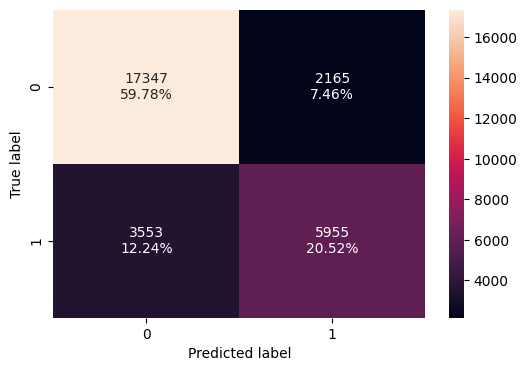

In [52]:
plot_confusion_matrix(log_reg_0, X_train, y_train)

In [53]:
# checking model performance for this model
log_reg_model_train_perf = model_performance_classification(
    log_reg_0, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.802963,0.626315,0.733374,0.67563


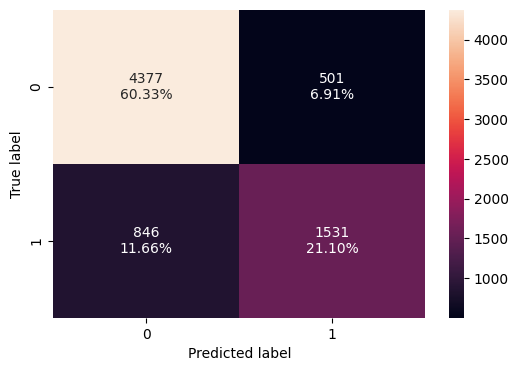

In [54]:
plot_confusion_matrix(log_reg_0, X_test, y_test)

In [55]:
# checking model performance for this model
log_reg_model_test_perf = model_performance_classification(
    log_reg_0, X_test, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.814335,0.644089,0.753445,0.694489


* The model has a low F1 score on the training and test sets.
* However, the training and test F1 scores are close enough, indicating the model is not overfitting.

### K-Nearest Neighbor

We build the KNN model by setting K=3

In [56]:
# instantiate learning model (k = 3)
knn_0 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_0.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

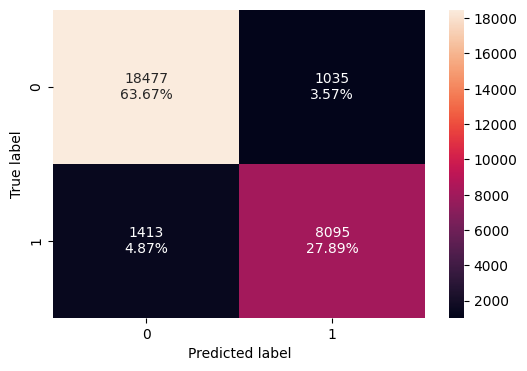

In [57]:
plot_confusion_matrix(knn_0, X_train, y_train)

In [58]:
knn_0_perf_train = model_performance_classification(
    knn_0, X_train, y_train
)
knn_0_perf_train

,Accuracy,Recall,Precision,F1
0,0.915644,0.851388,0.886637,0.868655


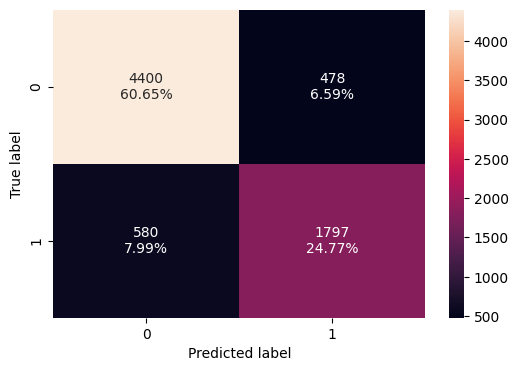

In [59]:
plot_confusion_matrix(knn_0, X_test, y_test)

In [60]:
knn_0_perf_test = model_performance_classification(
    knn_0, X_test, y_test
)
knn_0_perf_test

,Accuracy,Recall,Precision,F1
0,0.85417,0.755995,0.78989,0.772571


- The model is overfitted to training data.

###Naive Bayes

In [61]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

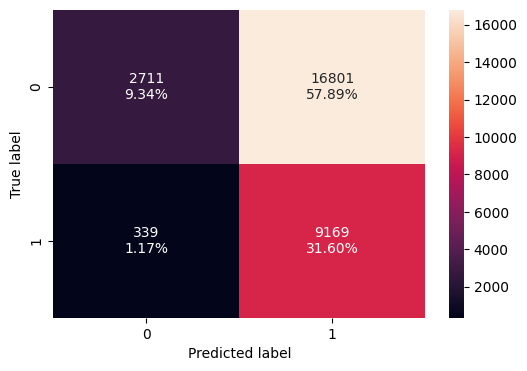

In [62]:
plot_confusion_matrix(nb, X_train, y_train)

In [63]:
nb_perf_train = model_performance_classification(
    nb, X_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.409373,0.964346,0.353061,0.516884


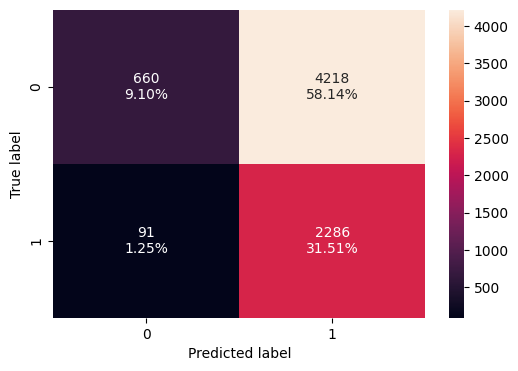

In [64]:
plot_confusion_matrix(nb, X_test, y_test)

In [65]:
nb_perf_test = model_performance_classification(
    nb, X_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.406065,0.961716,0.351476,0.514807


### Support Vector Machine

In [66]:
# fitting SVM model
svm_0 = SVC(kernel='linear', probability=True)
svm_0.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

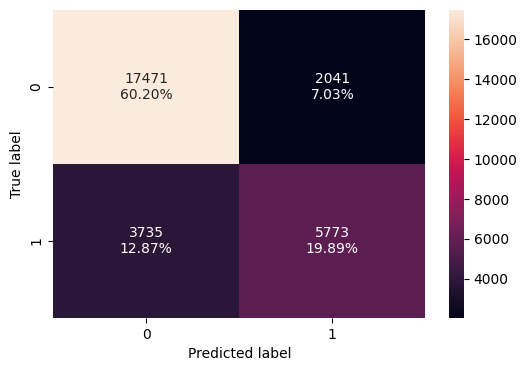

In [67]:
plot_confusion_matrix(model=svm_0, predictors= X_train, target=y_train)

In [68]:
print("Training performance:")
model_lin_kern = model_performance_classification(model=svm_0, predictors=X_train, target=y_train)
model_lin_kern

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800965,0.607173,0.738802,0.666551


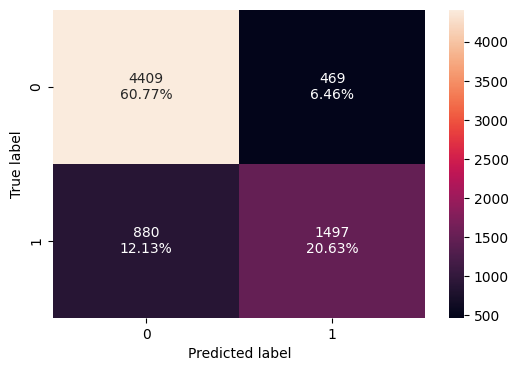

In [69]:
plot_confusion_matrix(model=svm_0,predictors= X_test, target=y_test)

In [70]:
print("Test performance:")
model_lin_kern_test = model_performance_classification(model=svm_0, predictors=X_test, target=y_test)
model_lin_kern_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.814059,0.629785,0.761445,0.689385


**Observations**

- The train and test f1_score of the model is ~0.66 and we will try to improve it further

## Model Performance Improvement

### Logistic Regression - Changing Threshold

* Let's see if the F1 score can be improved further by changing the classification threshold.
* We'll try to arrive at the optimal threshold by checking two curves:
    - ROC curve
    - Precision-Recall curve

#### Optimal threshold from ROC curve

Let's first display the ROC curve and compute the ROC-AUC score.

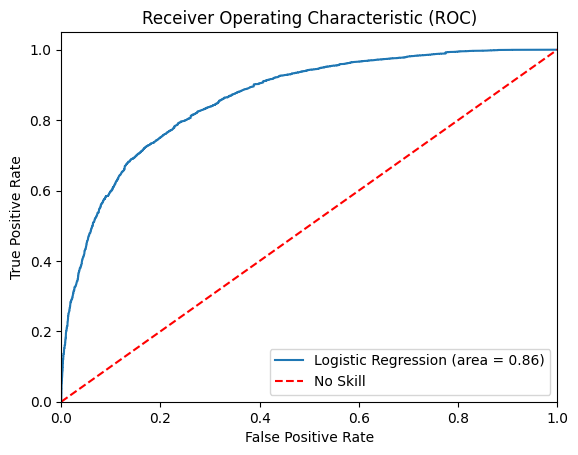

In [71]:
logit_roc_auc = roc_auc_score(y_train, log_reg_0.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, log_reg_0.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [72]:
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3037455764702451


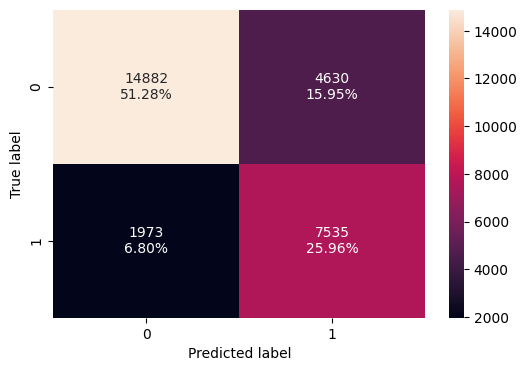

In [73]:
# creating confusion matrix on training data
plot_confusion_matrix(
    log_reg_0, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [74]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification(
    log_reg_0, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.772467,0.792491,0.6194,0.695335


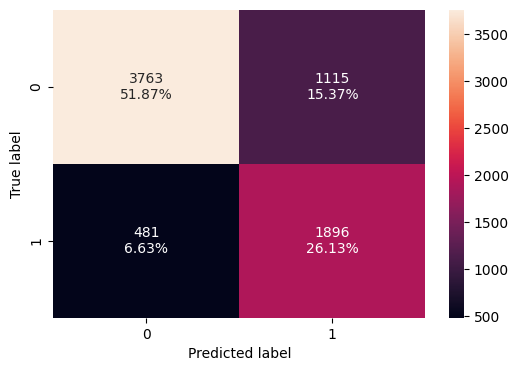

In [75]:
# creating confusion matrix on testing data
plot_confusion_matrix(
    log_reg_0, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [76]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification(
    log_reg_0, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.780014,0.797644,0.629691,0.703786


* The model's performance has improved significantly.
* The model gives an F1 score of approximately 0.70, compared to the initial model, which had an F1 score of 0.67.

#### Optimal Threshold from Precision-Recall curve

Let's first display the Precision-Recall curve.

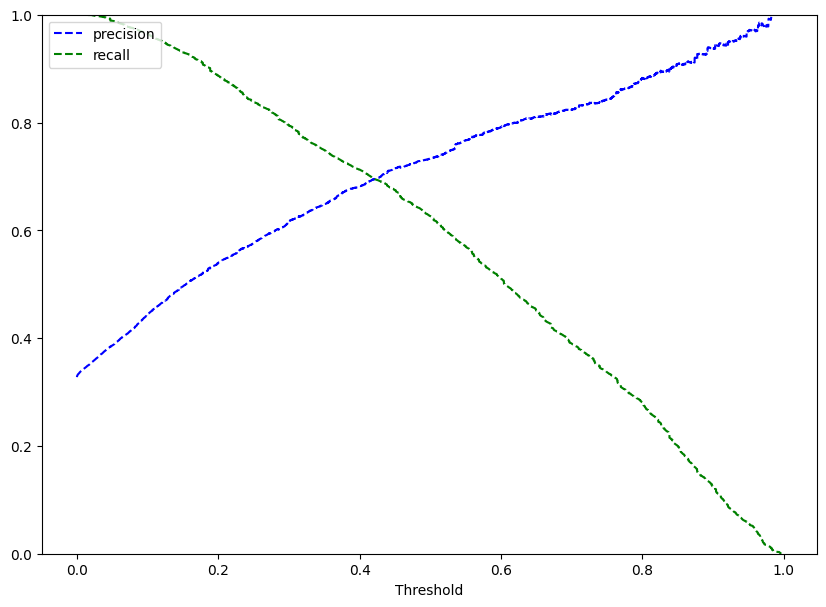

In [77]:
y_scores = log_reg_0.predict_proba(X_train)[:, 1]
prec, rec, thres = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_thres(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_thres(prec, rec, thres)
plt.show()

In [78]:
# the optimal threshold will be the point where precision and recall are the same
# we first find the index where the precision and recall are the same
# then we find the threshold for the corresponding index
idx = np.where((rec == prec) == True)[0][0]
optimal_threshold_prec_rec = thres[idx]
print(optimal_threshold_prec_rec)

0.4213581048898689


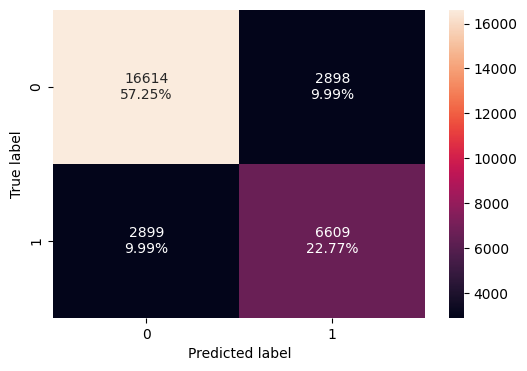

In [79]:
# creating confusion matrix on training data
plot_confusion_matrix(log_reg_0, X_train, y_train, threshold=optimal_threshold_prec_rec)

In [80]:
log_reg_model_train_perf_threshold_curve = model_performance_classification(
    log_reg_0, X_train, y_train, threshold=optimal_threshold_prec_rec
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.800241,0.695099,0.695172,0.695135


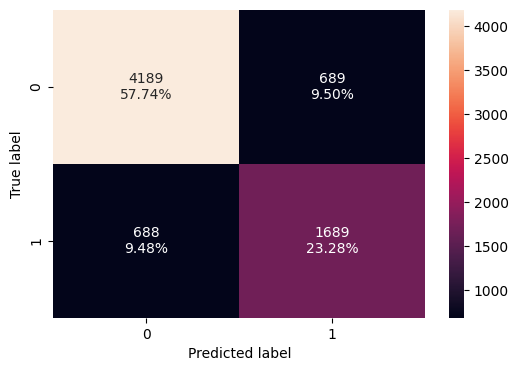

In [81]:
# creating confusion matrix on testing data
plot_confusion_matrix(log_reg_0, X_test, y_test, threshold=optimal_threshold_prec_rec)

In [82]:
log_reg_model_test_perf_threshold_curve = model_performance_classification(
    log_reg_0, X_test, y_test, threshold=optimal_threshold_prec_rec
)
print("Testing performance:")
log_reg_model_test_perf_threshold_curve

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.8102,0.71056,0.710261,0.71041


* The F1 score has slightly increased compared to the initial model.
* The model is giving better performance with a 0.42 threshold found using the AUC-ROC curve, it is generalizing well on test data better than initial models.

### K-Nearest Neighbor - Different values of K

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We'll gradually explore different values of K to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

In [83]:
# creating a list of odd values of K for KNN
neighbors = [i for i in range(3, 20) if i % 2 != 0]

# empty list that will hold F1 scores
f1_scores_train = []
f1_scores_test = []

# perform F1 metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate F1 on train and test
    score_train = f1_score(y_train, y_pred_train)
    f1_scores_train.append(score_train)
    score_test = f1_score(y_test, y_pred_test)
    f1_scores_test.append(score_test)


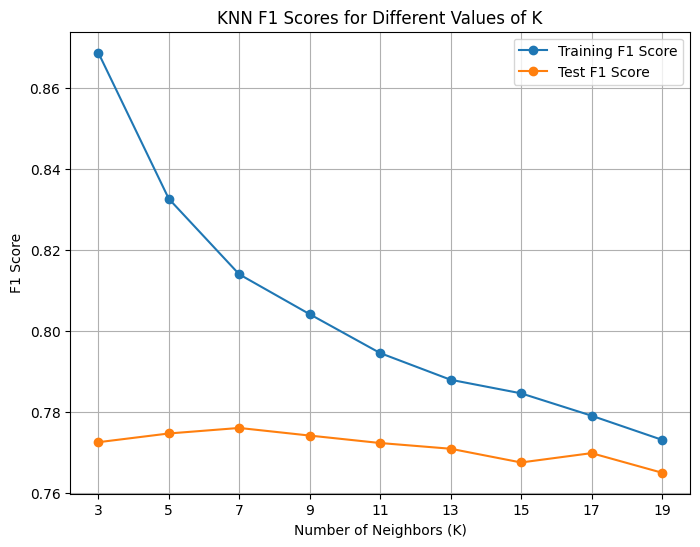

In [84]:
# Plot F1 scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, f1_scores_train, label='Training F1 Score', marker='o')
plt.plot(neighbors, f1_scores_test, label='Test F1 Score', marker='o')
plt.title('KNN F1 Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

- For K=3, we get the highest training performance, but the test performance is comparatively lower (by ~8%). This indicates that the model is overfitting the data

- For K=7, the test performance is the highest among all values of K. In addition, the delta between training and test performances is low (~4%).

- For larger values of K, both the training and test performances are lower.

- We'll go ahead with K=7 as the best value of K.

In [85]:
# instantiate learning model (k = 7)
knn_1 = KNeighborsClassifier(n_neighbors = 7)
# fitting the model
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

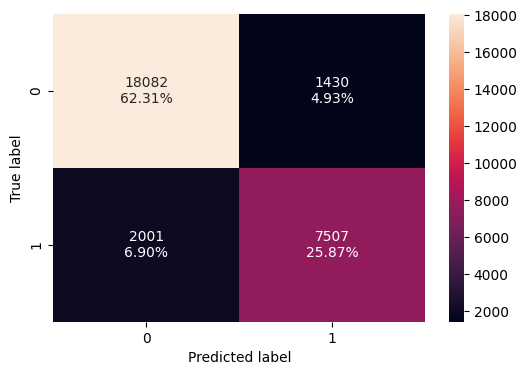

In [86]:
plot_confusion_matrix(knn_1, X_train, y_train)

In [87]:
knn_1_perf_train = model_performance_classification(
    knn_1, X_train, y_train
)
knn_1_perf_train

,Accuracy,Recall,Precision,F1
0,0.881771,0.789546,0.839991,0.813988


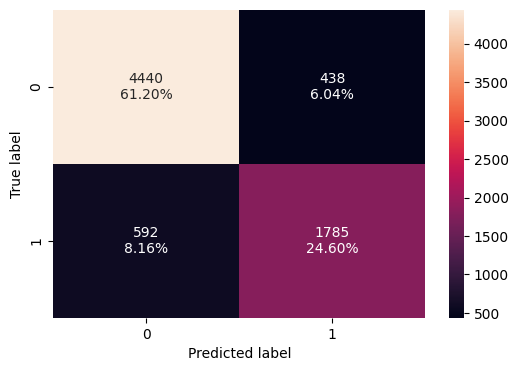

In [88]:
plot_confusion_matrix(knn_1, X_test, y_test)

In [89]:
knn_1_perf_test = model_performance_classification(
    knn_1, X_test, y_test
)
knn_1_perf_test

,Accuracy,Recall,Precision,F1
0,0.858029,0.750947,0.802969,0.776087


### Support Vector Machine - Changing Parameters

* Let's see if the f1_score can be improved further by changing the hyperparameters i.e., the kernel, C, and gamma.

#### Support Vector Machine (Kernel = "Polynomial" , Degree = 2 )

In [90]:
# fitting SVM model
svm_1 = SVC(kernel='poly',degree=2, probability=True)
svm_1.fit(X_train,y_train)

SVC(degree=2, kernel='poly', probability=True)

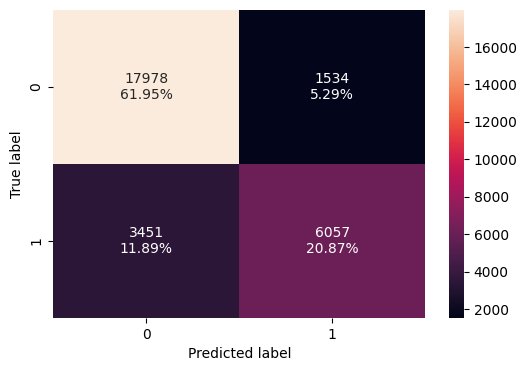

In [92]:
plot_confusion_matrix(model=svm_1,predictors= X_train, target=y_train)

In [93]:
print("Training performance:")
model_poly_kern = model_performance_classification(model=svm_1, predictors=X_train, target=y_train)
model_poly_kern

Training performance:


,Accuracy,Recall,Precision,F1
0,0.828222,0.637042,0.797919,0.708462


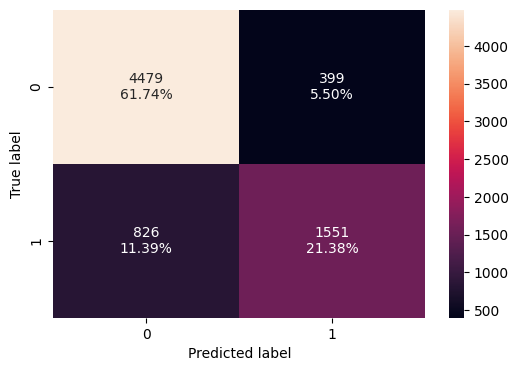

In [94]:
plot_confusion_matrix(model=svm_1,predictors= X_test, target=y_test)

In [96]:
print("Test performance:")
model_poly_kern_test = model_performance_classification(model=svm_1, predictors=X_test, target=y_test)
model_poly_kern_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.831151,0.652503,0.795385,0.716894


- Model performance improved compared to the initial model.
- The Support Vector Machine with a polynomial kernel of degree 2 successfully increased the performance.

#### Support Vector Machine (Kernel = "Polynomial", Degree = 2, Gamma = 0.016)

In [97]:
svm_1._gamma

0.06534540506116647

In [98]:
# fitting SVM model
svm_2 = SVC(kernel='poly',degree=2,gamma=0.016, probability=True)
svm_2.fit(X_train,y_train)

SVC(degree=2, gamma=0.016, kernel='poly', probability=True)

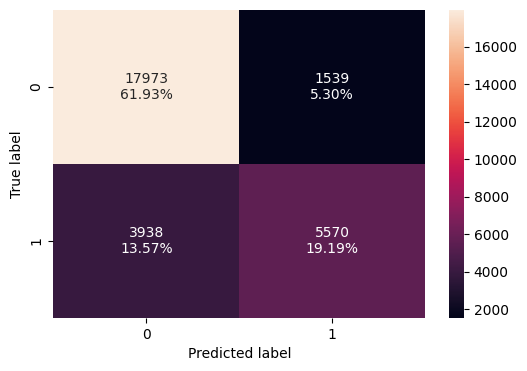

In [99]:
plot_confusion_matrix(model=svm_2,predictors= X_train, target=y_train)

In [100]:
print("Training performance:")
model_poly2_gamma = model_performance_classification(model=svm_2, predictors=X_train, target=y_train)
model_poly2_gamma

Training performance:


,Accuracy,Recall,Precision,F1
0,0.811268,0.585822,0.783514,0.670398


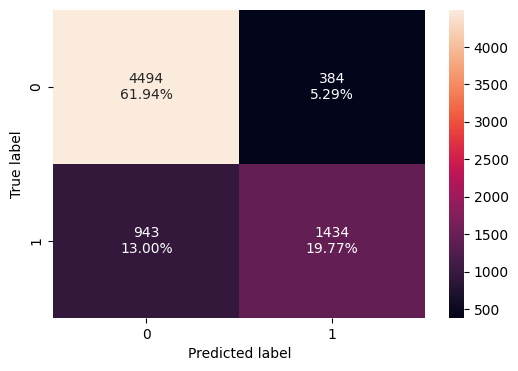

In [101]:
plot_confusion_matrix(model=svm_2,predictors= X_test, target=y_test)

In [102]:
print("Test performance:")
model_poly2_gamma_test = model_performance_classification(model=svm_2, predictors=X_test, target=y_test)
model_poly2_gamma_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.817092,0.603281,0.788779,0.683671


- Model performance decreased compared to the initial model. The Support Vector Machine with a polynomial kernel of degree 2 and gamma 0.016 failed to improve the performance.

#### Support Vector Machine (Kernel = "Polynomial", Degree = 2, Gamma = 0.016, C = 0.1)

In [103]:
# fitting SVM model
svm_3 = SVC(kernel='poly',degree=2,gamma=0.016,C=0.1, probability=True)
svm_3.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma=0.016, kernel='poly', probability=True)

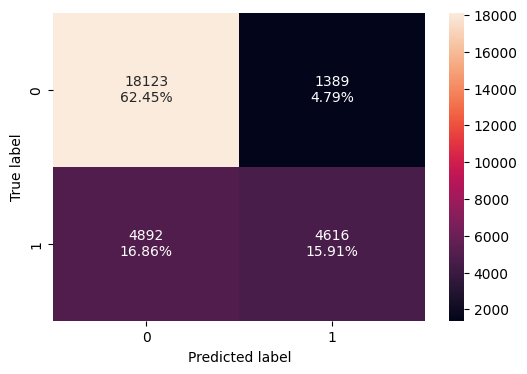

In [104]:
plot_confusion_matrix(model=svm_3,predictors= X_train, target=y_train)

In [105]:
print("Training performance:")
model_poly2_gamma_C = model_performance_classification(model=svm_3, predictors=X_train, target=y_train)
model_poly2_gamma_C

Training performance:


,Accuracy,Recall,Precision,F1
0,0.783563,0.485486,0.768693,0.595114


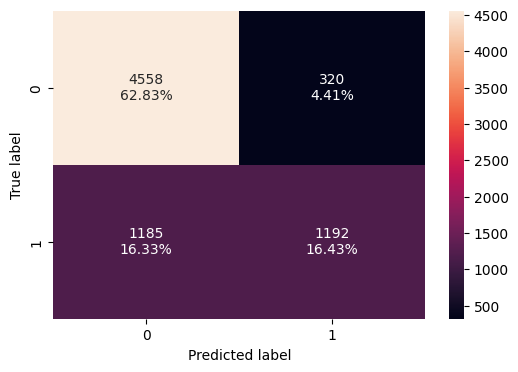

In [106]:
plot_confusion_matrix(model=svm_3,predictors= X_test, target=y_test)

In [107]:
print("Test performance:")
model_poly2_gamma_C_test = model_performance_classification(model=svm_3, predictors=X_test, target=y_test)
model_poly2_gamma_C_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.792557,0.501472,0.78836,0.613011


Model performance decreased compared to the initial model. The Support Vector Machine with a polynomial kernel of degree 2, gamma 0.016, and C = 0.1 failed to improve performance.

- **Let's increase the degree of the polynomial.**

#### Support Vector Machine (Kernel = "Polynomial" , Degree = 3 )

In [108]:
# fitting SVM model
svm_4 = SVC(kernel='poly',degree=3, probability=True)
svm_4.fit(X_train,y_train)

SVC(kernel='poly', probability=True)

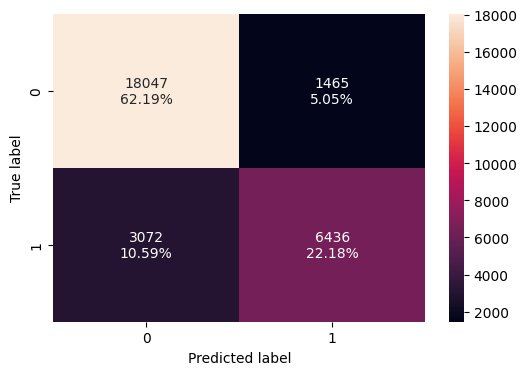

In [109]:
plot_confusion_matrix(model=svm_4,predictors= X_train, target=y_train)

In [110]:
print("Training performance:")
model_poly_kern_3 = model_performance_classification(model=svm_4, predictors=X_train, target=y_train)
model_poly_kern_3

Training performance:


,Accuracy,Recall,Precision,F1
0,0.84366,0.676904,0.81458,0.739388


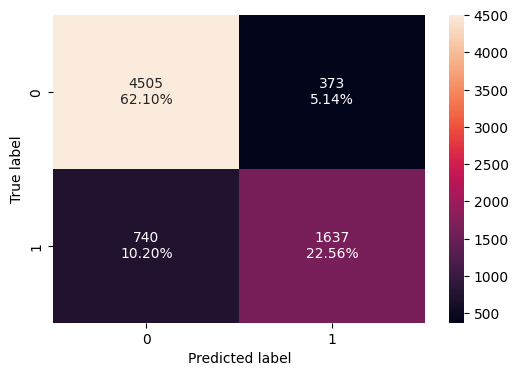

In [111]:
plot_confusion_matrix(model=svm_4,predictors= X_test, target=y_test)

In [112]:
print("Test performance:")
model_poly_kern_3_test = model_performance_classification(model=svm_4, predictors=X_test, target=y_test)
model_poly_kern_3_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.846589,0.688683,0.814428,0.746296


- Here with increasing Polynomial kernel degree to 3, both the train and test performance has been improved to ~74.

#### Support Vector Machine (Kernel = "Polynomial", Degree = 3, Gamma = 0.016)

In [113]:
# fitting SVM model
svm_5 = SVC(kernel='poly',degree=3,gamma=0.016, probability=True)
svm_5.fit(X_train,y_train)

SVC(gamma=0.016, kernel='poly', probability=True)

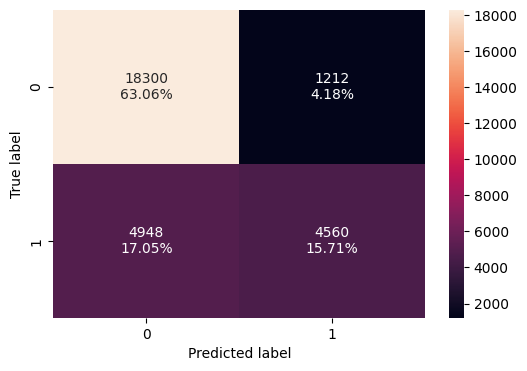

In [114]:
plot_confusion_matrix(model=svm_5,predictors= X_train, target=y_train)

In [115]:
print("Training performance:")
model_poly3_gamma = model_performance_classification(model=svm_5, predictors=X_train, target=y_train)
model_poly3_gamma

Training performance:


,Accuracy,Recall,Precision,F1
0,0.787733,0.479596,0.790021,0.596859


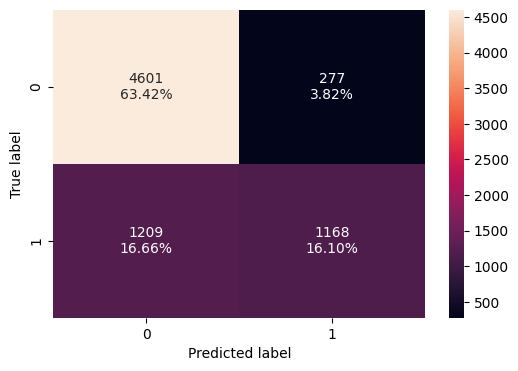

In [116]:
plot_confusion_matrix(model=svm_5,predictors= X_test, target=y_test)

In [117]:
print("Test performance:")
model_poly3_gamma_test = model_performance_classification(model=svm_5, predictors=X_test, target=y_test)
model_poly3_gamma_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795176,0.491376,0.808304,0.611198


Model performance decreased compared to the initial model. The Support Vector Machine with a polynomial kernel of degree 3 and gamma 0.016 failed to improve performance.

#### Support Vector Machine (Kernel = "Polynomial", Degree = 3, Gamma = 0.016, C = 0.1)

In [118]:
# fitting SVM model
svm_6 = SVC(kernel='poly',degree=3,gamma=0.016,C=0.1, probability=True)
svm_6.fit(X_train,y_train)

SVC(C=0.1, gamma=0.016, kernel='poly', probability=True)

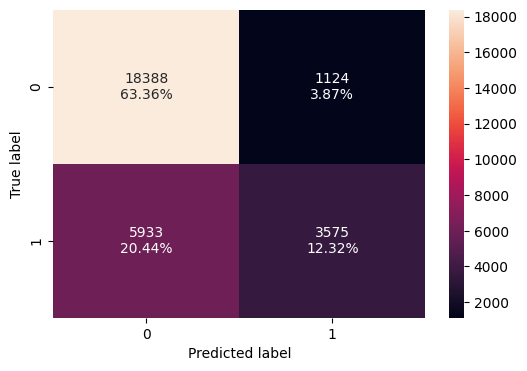

In [119]:
plot_confusion_matrix(model=svm_6,predictors= X_train, target=y_train)

In [120]:
print("Training performance:")
model_poly3_gamma_C = model_performance_classification(model=svm_6, predictors=X_train, target=y_train)
model_poly3_gamma_C

Training performance:


,Accuracy,Recall,Precision,F1
0,0.756823,0.375999,0.7608,0.503273


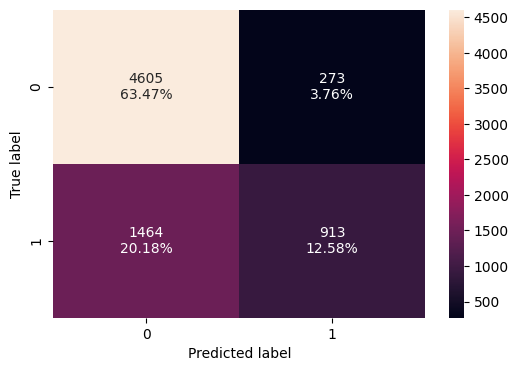

In [121]:
plot_confusion_matrix(model=svm_6,predictors= X_test, target=y_test)

In [122]:
print("Test performance:")
model_poly3_gamma_C_test = model_performance_classification(model=svm_6, predictors=X_test, target=y_test)
model_poly3_gamma_C_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.760579,0.384098,0.769815,0.512489


Model performance decreased compared to the initial model. The Support Vector Machine with a polynomial kernel of degree 3, gamma 0.016, and C = 0.1 failed to improve performance.

#### Support Vector Machine (Kernel = "Rbf")

In [123]:
0# fitting SVM model
svm_7 = SVC(kernel='rbf', probability=True)
svm_7.fit(X_train,y_train)

SVC(probability=True)

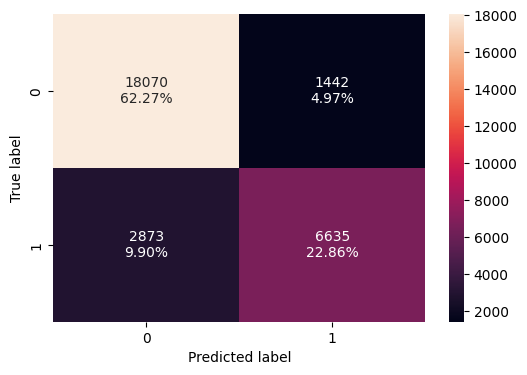

In [124]:
plot_confusion_matrix(model=svm_7,predictors= X_train, target=y_train)

In [125]:
print("Training performance:")
model_rbf_kern = model_performance_classification(model=svm_7, predictors=X_train, target=y_train)
model_rbf_kern

Training performance:


,Accuracy,Recall,Precision,F1
0,0.851309,0.697833,0.821468,0.75462


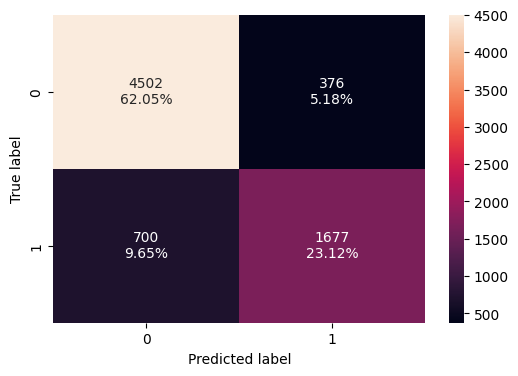

In [126]:
plot_confusion_matrix(model=svm_7,predictors= X_test, target=y_test)

In [127]:
print("Test performance:")
model_rbf_kern_test = model_performance_classification(model=svm_7, predictors=X_test, target=y_test)
model_rbf_kern

Test performance:


,Accuracy,Recall,Precision,F1
0,0.851309,0.697833,0.821468,0.75462


- Here with increasing Polynomial kernel degree to 3, both the train and test performance has been improved to ~75.
- We can consider this model as best estimator.

#### Support Vector Machine (Kernel = "rbf", Gamma = 0.016)

In [128]:
0# fitting SVM model
svm_8 = SVC(kernel='rbf',gamma=0.016, probability=True)
svm_8.fit(X_train,y_train)

SVC(gamma=0.016, probability=True)

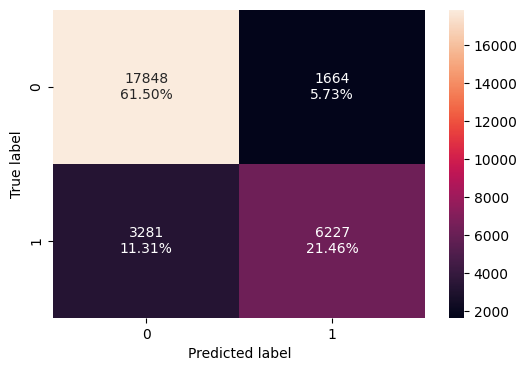

In [129]:
plot_confusion_matrix(model=svm_8,predictors= X_train, target=y_train)

In [130]:
print("Training performance:")
model_rbf_gamma = model_performance_classification(model=svm_8, predictors=X_train, target=y_train)
model_rbf_gamma

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8296,0.654922,0.789127,0.715788


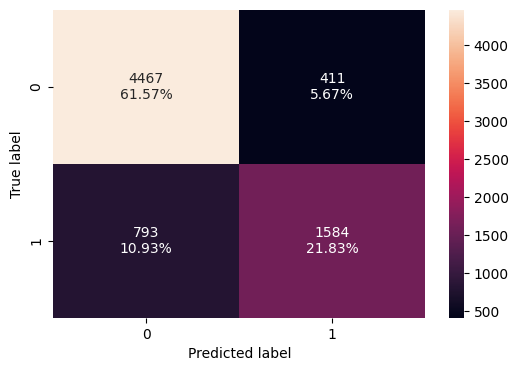

In [131]:
plot_confusion_matrix(model=svm_8,predictors= X_test, target=y_test)

In [132]:
print("Test performance:")
model_rbf_gamma_test = model_performance_classification(model=svm_8, predictors=X_test, target=y_test)
model_rbf_gamma_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.834045,0.666386,0.793985,0.724611


- The model performance is good both on training and test data.
- But model performance decreased compared to the initial model

#### Support Vector Machine (Kernel = "rbf", Gamma = 0.016, C = 0.1)

In [133]:
0# fitting SVM model
svm_9 = SVC(kernel='rbf',gamma=0.016,C=0.1,probability=True)
svm_9.fit(X_train,y_train)

SVC(C=0.1, gamma=0.016, probability=True)

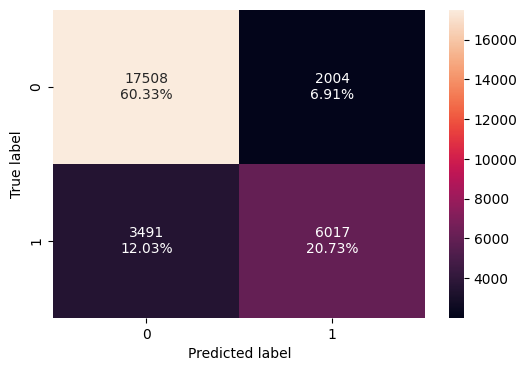

In [134]:
plot_confusion_matrix(model=svm_9,predictors= X_train, target=y_train)

In [135]:
print("Training performance:")
model_rbf_gamma_C = model_performance_classification(model=svm_9, predictors=X_train, target=y_train)
model_rbf_gamma_C

Training performance:


,Accuracy,Recall,Precision,F1
0,0.810648,0.632836,0.750156,0.686519


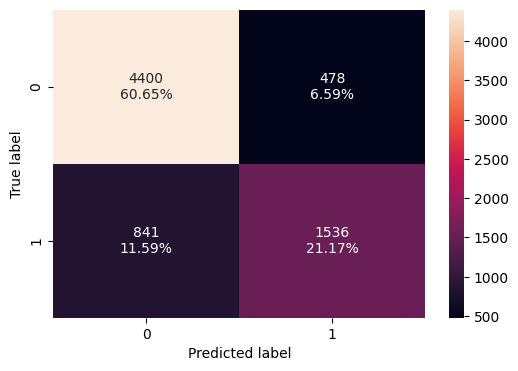

In [136]:
plot_confusion_matrix(model=svm_9,predictors= X_test, target=y_test)

In [137]:
print("Test performance:")
model_rbf_gamma_C_test = model_performance_classification(model=svm_9, predictors=X_test, target=y_test)
model_rbf_gamma_C_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.818194,0.646193,0.762661,0.699613


Model performance decreased compared to the initial model.

## Model Performance Comparison and Final Model Selection

- Among the four sets of models i.e., Logistic regression, KNN, Naive Bayes, and SVM, we will compare F1 scores and will select final model as our best estimator.

In [138]:
# training performance comparison

best_models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        knn_0_perf_train.T,
        knn_1_perf_train.T,
        nb_perf_train.T,
        model_lin_kern.T,
        model_poly_kern.T,
        model_poly2_gamma.T,
        model_poly2_gamma_C.T,
        model_poly_kern_3.T,
        model_poly3_gamma.T,
        model_poly3_gamma_C.T,
        model_rbf_kern.T,
        model_rbf_gamma.T,
        model_rbf_gamma_C.T

    ],
    axis=1,
)
best_models_train_comp_df.columns = [
    "Logistic Regression - default threshold",
    "Logistic Regression - 0.30 threshold",
    "Logistic Regression - 0.42 threshold",
    "K Nearest Neighbor K=3",
    "K Nearest Neighbor K=7",
    "Naive Bayes",
    "SVM-Linear Kernel (default)",

    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1 ",

    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

    "SVM-Rbf Kernel",
    "SVM-Rbf Kernel , gamma = 0.016 ",
    "SVM-Rbf Kernel , gamma = 0.016, C = 0.1 ",

]

print("Best models training performance comparison:")
best_models_train_comp_df.T

Best models training performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression - default threshold,0.802963,0.626315,0.733374,0.675630
Logistic Regression - 0.30 threshold,0.772467,0.792491,0.619400,0.695335
Logistic Regression - 0.42 threshold,0.800241,0.695099,0.695172,0.695135
K Nearest Neighbor K=3,0.915644,0.851388,0.886637,0.868655
K Nearest Neighbor K=7,0.881771,0.789546,0.839991,0.813988
Naive Bayes,0.409373,0.964346,0.353061,0.516884
SVM-Linear Kernel (default),0.800965,0.607173,0.738802,0.666551
"SVM-Polynomial Kernel , degree = 2",0.828222,0.637042,0.797919,0.708462
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016",0.811268,0.585822,0.783514,0.670398
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1",0.783563,0.485486,0.768693,0.595114


In [139]:
# testing performance comparison

best_models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        knn_0_perf_test.T,
        knn_1_perf_test.T,
        nb_perf_test.T,
        model_lin_kern_test.T,
        model_poly_kern_test.T,
        model_poly2_gamma_test.T,
        model_poly2_gamma_C_test.T,
        model_poly_kern_3_test.T,
        model_poly3_gamma_test.T,
        model_poly3_gamma_C_test.T,
        model_rbf_kern_test.T,
        model_rbf_gamma_test.T,
        model_rbf_gamma_C_test.T
    ],
    axis=1,
)

best_models_test_comp_df.columns = [
    "Logistic Regression - default threshold",
    "Logistic Regression - 0.30 threshold",
    "Logistic Regression - 0.42 threshold",
    "K Nearest Neighbor K=3",
    "K Nearest Neighbor K=7",
    "Naive Bayes",
    "SVM-Linear Kernel (default)",

    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1 ",

    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

    "SVM-Rbf Kernel",
    "SVM-Rbf Kernel , degree = 3 , gamma = 0.016 ",
    "SVM-Rbf Kernel , degree = 3 , gamma = 0.016, C = 0.1 ",

]

print("Best models test set performance comparison:")
best_models_test_comp_df.T

Best models test set performance comparison:


,Accuracy,Recall,Precision,F1
Logistic Regression - default threshold,0.814335,0.644089,0.753445,0.694489
Logistic Regression - 0.30 threshold,0.780014,0.797644,0.629691,0.703786
Logistic Regression - 0.42 threshold,0.810200,0.710560,0.710261,0.710410
K Nearest Neighbor K=3,0.854170,0.755995,0.789890,0.772571
K Nearest Neighbor K=7,0.858029,0.750947,0.802969,0.776087
Naive Bayes,0.406065,0.961716,0.351476,0.514807
SVM-Linear Kernel (default),0.814059,0.629785,0.761445,0.689385
"SVM-Polynomial Kernel , degree = 2",0.831151,0.652503,0.795385,0.716894
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016",0.817092,0.603281,0.788779,0.683671
"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016, C = 0.1",0.792557,0.501472,0.788360,0.613011


- The SVM model with RBF (Gaussian) kernel and default values of gamma and C is the best in terms of the train and test F1 scores
- We can consider it our best-performing model.

### Feature Importance

We'll check the most important features for the best model to determine chances of hotel booking cancellation.

In [ ]:
# Fit the SVM model
best_estimator = svm_7

# Get feature names
feature_names = X_train.columns

# Calculate permutation importance with fewer repeats and parallel processing
perm_importance = permutation_importance(best_estimator, X_train, y_train, scoring='f1', n_repeats=3, n_jobs=-1)

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Sort feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importance in descending order
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Feature Importance');
#plt.title('Feature Importance')

## Actionable Insights and Recommendations

### Insights

* Overall we can see that the SVM-Rbf Kernel  model performs better on the dataset.
* Looking at important variables based on feature importance in the SVM model.
    * Lead Time, Number of special requests, Average price per room are important in model.

### Business Recommendations

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. One can analyze further and identify thresholds for different attributes based on which customers are less likely to cancel their bookings.

    * Using this information, the hotel can take the following actions:
        * Set up a system that can send a prompt like an automated email to the customers before the arrival date asking for a  re-confirmation of their booking and any changes they would like to make in their bookings.
        * Remind guests about imminent deadlines.

The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.


2. Stricter cancellation policies can be adopted by the hotel.
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In the months of December and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. October and September saw the highest number of bookings but also high number of cancellations. This should be investigated further by the hotel.


6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show the guests the level of attention and care they would receive at the hotel.
    * To give guests a personalized experience, information about local events, nearby places to explore, etc can be shared from time to time.


7. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
    * A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
    * Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.